## Robust Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
sn.set(style='whitegrid')

## Generate some data points with i.i.d. Gaussian nosies

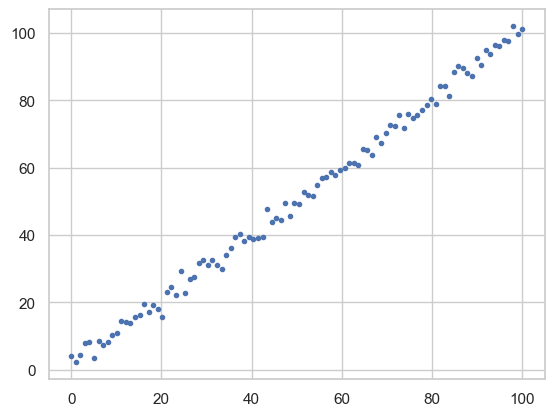

In [2]:
X = np.linspace(0,100,100)
w = [0.5, 1]
rng = np.random.RandomState(0)
Y = w[0] + w[1]*X + 2*rng.randn(100)
#%%
plt.plot(X, Y, '.')

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(100,1), Y.reshape(100,), test_size=0.2, random_state=0)

Text(0.5, 1.0, 'testing data')

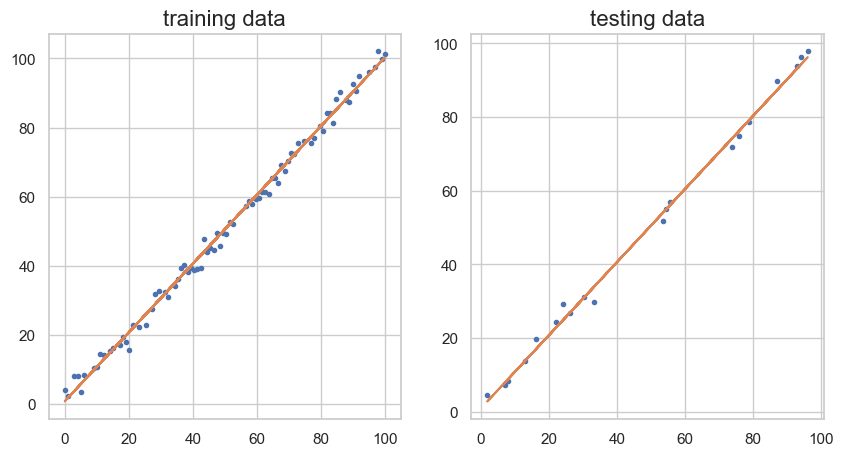

In [4]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, Y_train)
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
# plot the fitted line
w0=linear_model.coef_ 
w1=linear_model.intercept_ 
#%%
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(X_train, Y_train, '.')
ax[0].plot(X_train, Y_train_pred, '-')
ax[0].set_title('training data', fontsize=16)
ax[1].plot(X_test, Y_test, '.')
ax[1].plot(X_test, Y_test_pred, '-')
ax[1].set_title('testing data', fontsize=16)

## Generate some data points with Gaussian and non-Gaussian nosies

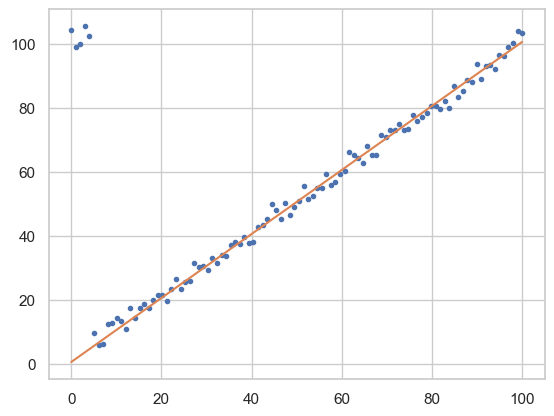

In [5]:
X = np.linspace(0,100,100)
w = [0.5, 1]
Y = w[0] + w[1]*X + 2*rng.randn(100)
Y[0:5]+=100
#show the points
plt.plot(X, Y, '.')
plt.plot(X, w[0] + w[1]*X, '-')

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(100,1), Y.reshape(100,), test_size=0.2, random_state=0)

### apply standard linear regression (ordinary least squares fitting)

Text(0.5, 1.0, 'testing data')

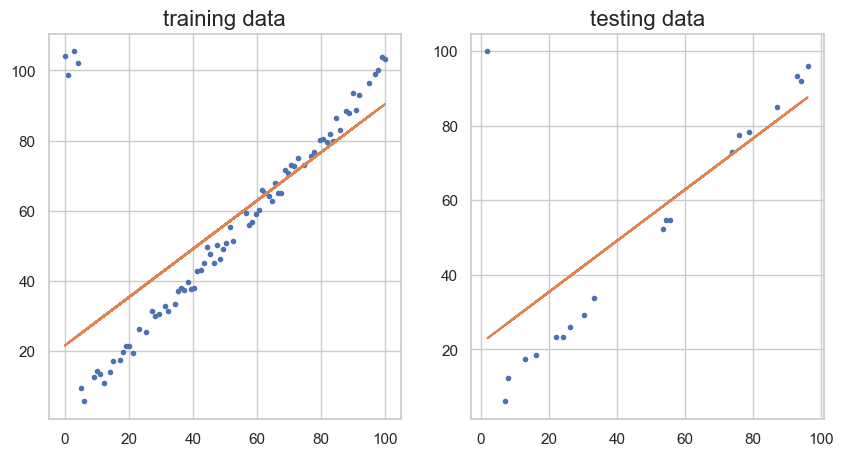

In [7]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, Y_train)
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
# plot the fitted line
w0=linear_model.coef_ 
w1=linear_model.intercept_ 
#%%
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(X_train, Y_train, '.')
ax[0].plot(X_train, Y_train_pred, '-')
ax[0].set_title('training data', fontsize=16)
ax[1].plot(X_test, Y_test, '.')
ax[1].plot(X_test, Y_test_pred, '-')
ax[1].set_title('testing data', fontsize=16)

### apply robust linear regression using RANSAC

Text(0.5, 1.0, 'testing data')

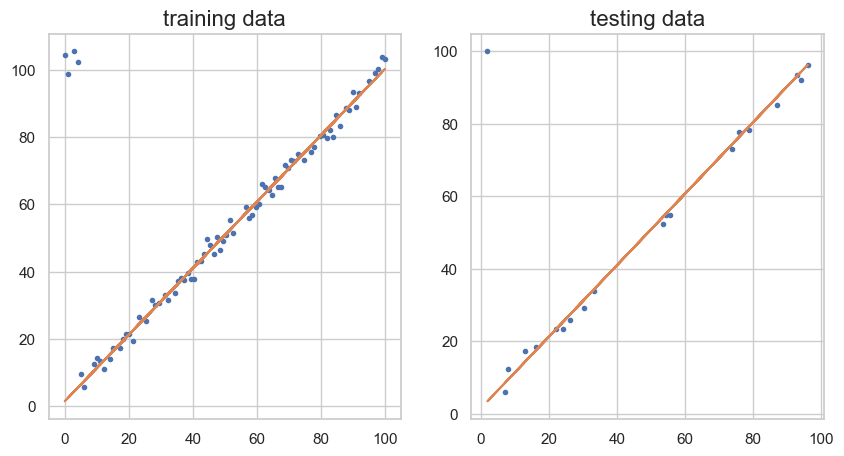

In [8]:
from sklearn.linear_model import RANSACRegressor
rnsac_model = RANSACRegressor(estimator=LinearRegression(fit_intercept=True))
rnsac_model.fit(X_train, Y_train)
Y_train_pred = rnsac_model.predict(X_train)
Y_test_pred = rnsac_model.predict(X_test)
# plot the fitted line
w0=rnsac_model.estimator_.coef_ 
w1=rnsac_model.estimator_.intercept_ 
#%%
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(X_train, Y_train, '.')
ax[0].plot(X_train, Y_train_pred, '-')
ax[0].set_title('training data', fontsize=16)
ax[1].plot(X_test, Y_test, '.')
ax[1].plot(X_test, Y_test_pred, '-')
ax[1].set_title('testing data', fontsize=16)

### apply robust linear regression using HuberRegressor

Text(0.5, 1.0, 'testing data')

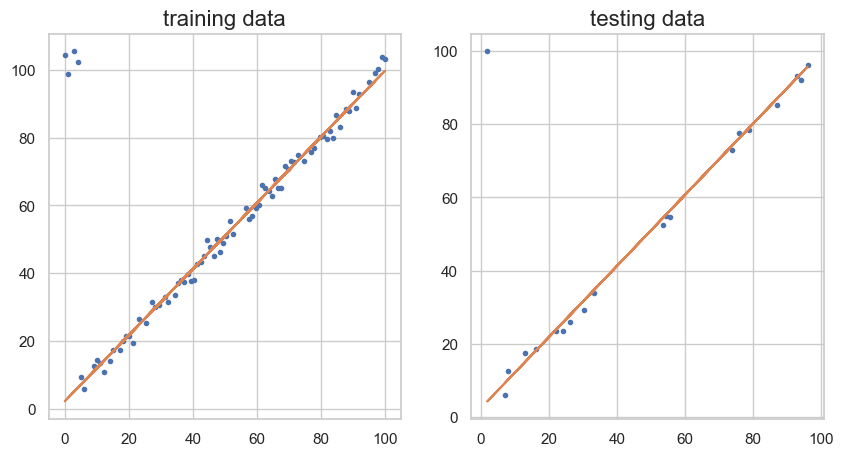

In [9]:
from sklearn.linear_model import HuberRegressor
huber_model = HuberRegressor(fit_intercept=True)
huber_model.fit(X_train, Y_train)
Y_train_pred = huber_model.predict(X_train)
Y_test_pred = huber_model.predict(X_test)
# plot the fitted line
w0=huber_model.coef_ 
w1=huber_model.intercept_ 
#%%
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(X_train, Y_train, '.')
ax[0].plot(X_train, Y_train_pred, '-')
ax[0].set_title('training data', fontsize=16)
ax[1].plot(X_test, Y_test, '.')
ax[1].plot(X_test, Y_test_pred, '-')
ax[1].set_title('testing data', fontsize=16)

In [10]:
def Huber(z, epsilon=1.35):    
    h=2*epsilon*np.absolute(z)-epsilon**2
    temp=np.where(np.absolute(z) < epsilon)    
    h[temp]= z[temp]**2
    return h

Text(0.5, 1.0, 'huber function vs quadratic function')

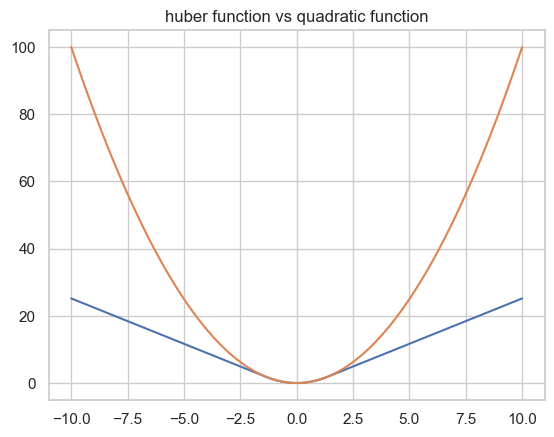

In [11]:
z=np.linspace(-10, 10, 100)
h=Huber(z)
plt.plot(z,h)
plt.plot(z,z**2)
plt.title('huber function vs quadratic function')

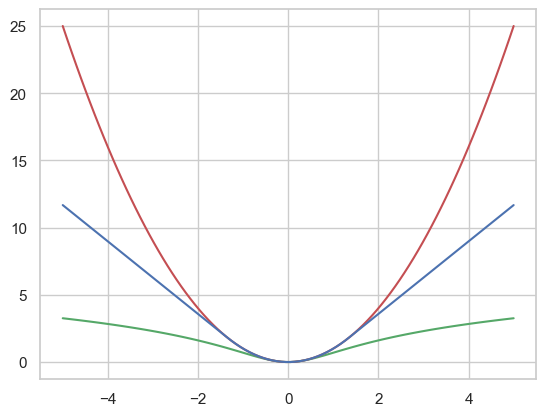

In [12]:
z=np.linspace(-5, 5, 100)
plt.plot(z, np.log(1+z**2),'g')
plt.plot(z, z**2,'r')
plt.plot(z, Huber(z),'b')